# Loan Prediction 03 - Training and validation of first models

We propose two models of different nature to predict the Loan approval: Logistic Regression and Random Forest.

- Random Forest: Flexibility treating variance in data; Can handle categorical and numerical data; Can handle missing data; Can overcome multicollinearity;
- Logistic Regression: can show direct relationship between inputs and output;

Now, let us train and validate our models with the preprocessed dataset

In [34]:
import sys
sys.path.append('utils')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('seaborn')


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import metrics_utils 
import model_utils

In [21]:
df_import = pd.read_csv('dataset/train_loan_preprocessed.csv')
df_import.drop(columns='Unnamed: 0',inplace = True)
df_import.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
2,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
4,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
5,1.0,1.0,0.0,1.0,0.0,2333,1516.0,95.0,360.0,1.0,2.0,1.0
6,1.0,1.0,3.0,0.0,0.0,3036,2504.0,158.0,360.0,0.0,1.0,0.0
7,1.0,1.0,2.0,0.0,0.0,4006,1526.0,168.0,360.0,1.0,2.0,1.0
8,1.0,1.0,1.0,0.0,0.0,12841,10968.0,349.0,360.0,1.0,1.0,0.0
9,1.0,1.0,2.0,0.0,0.0,3200,700.0,70.0,360.0,1.0,2.0,1.0


In [22]:
columns_x = df_import.columns[:-1]
column_y = ['Loan_Status']

X_train, X_validation, y_train, y_validation = train_test_split(
    df_import[columns_x], df_import[column_y],  test_size=0.20, random_state=42)

In [23]:
scaler = MinMaxScaler()
scaler.fit(df_import[columns_x])

X_train_norm = pd.DataFrame(data=scaler.transform(X_train),columns=X_train.columns)
X_validation_norm = pd.DataFrame(data=scaler.transform(X_validation),columns=X_train.columns)

In [24]:
X_train_norm.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,0.823113,0.650943,0.249214,0.221698,0.136792,0.064581,0.037308,0.225717,0.687978,0.832547,0.497642
std,0.382024,0.477235,0.338416,0.415880,0.344034,0.072559,0.067158,0.134044,0.148552,0.373821,0.388966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.034326,0.000000,0.153976,0.729730,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.046024,0.024744,0.196277,0.729730,1.000000,0.500000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.070077,0.054222,0.263959,0.729730,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X_validation_norm.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.792453,0.603774,0.279874,0.169811,0.094340,0.063555,0.048593,0.246081,0.698368,0.830189,0.551887
std,0.407477,0.491436,0.338490,0.377251,0.293689,0.081231,0.095400,0.145520,0.123326,0.377251,0.395987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000742,0.000000,0.069374,0.108108,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.032260,0.000000,0.162437,0.729730,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.041002,0.036984,0.208968,0.729730,1.000000,0.500000
75%,1.000000,1.000000,0.666667,0.000000,0.000000,0.069397,0.058002,0.297800,0.729730,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.781534,0.812082,1.000000,1.000000,1.000000,1.000000


In [26]:
# def plot precision_recall_curve(model, model_name,X_test,y_test):
#     lr_probs = model.predict_proba(X_test)
#     lr_probs = lr_probs[:, 1]
#     yhat = model.predict(X_test)
#     lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#     lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
#     print(model_name,': f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
#     no_skill = len(y_test[y_test==1]) / len(y_test)
#     pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
#     pyplot.plot(lr_recall, lr_precision, marker='.', label=model_name)
#     pyplot.xlabel('Recall')
#     pyplot.ylabel('Precision')
#     pyplot.legend()
#     pyplot.show()

### Logistic Regression Classifier

In [84]:
lr = LogisticRegression(C = 0.5,random_state=0,solver='liblinear',verbose=1)
lr.fit(X_train_norm.values,y_train.values.ravel())

[LibLinear]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [85]:
df_result = model_utils.predict(lr,X_validation_norm,y_validation)
df_result.head(10)

,TrueClass,Predicted
0,0.0,1.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


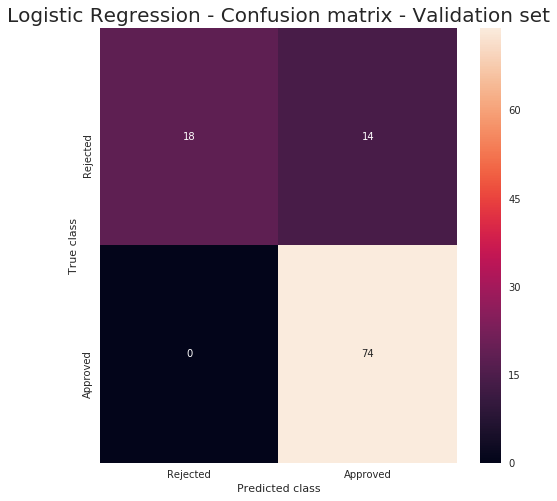

              precision    recall  f1-score   support

    Rejected       1.00      0.56      0.72        32
    Approved       0.84      1.00      0.91        74

    accuracy                           0.87       106
   macro avg       0.92      0.78      0.82       106
weighted avg       0.89      0.87      0.86       106

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.406


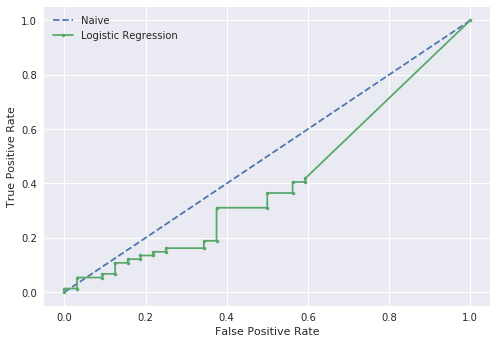

In [86]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,'Logistic Regression')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = lr,model_name = 'Logistic Regression',X_test = X_validation, y_test = y_validation)

### Random Forest Classifier

In [74]:
rfc = RandomForestClassifier(
            n_estimators = 100,
            min_samples_split = 3,
            random_state = 0)
rfc.fit(X_train_norm.values,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
df_result = model_utils.predict(rfc,X_validation_norm,y_validation)

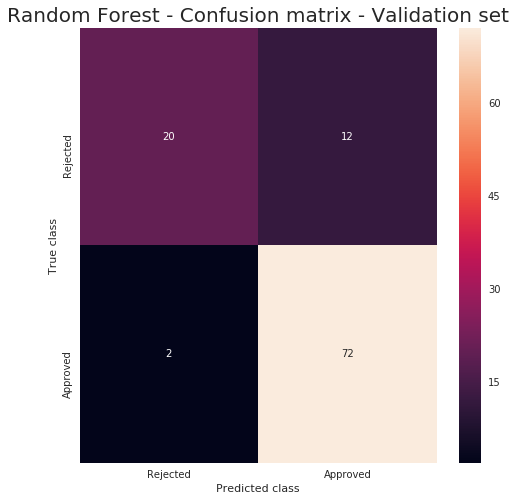

              precision    recall  f1-score   support

    Rejected       0.91      0.62      0.74        32
    Approved       0.86      0.97      0.91        74

    accuracy                           0.87       106
   macro avg       0.88      0.80      0.83       106
weighted avg       0.87      0.87      0.86       106

No Skill: ROC AUC=0.500
Random Forest : ROC AUC=0.527


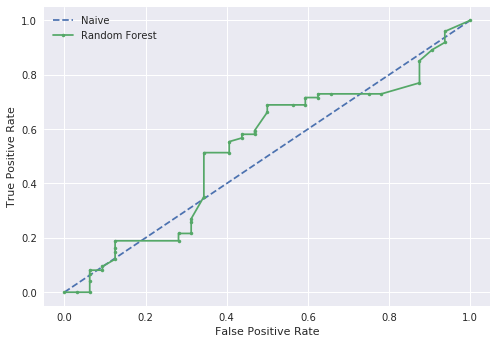

In [76]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,title = 'Random Forest')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = rfc,model_name = 'Random Forest',X_test = X_validation, y_test = y_validation)

### Gradient Boosting

In [77]:
gboost = GradientBoostingClassifier(
            n_estimators = 50,
            random_state = 0)
gboost.fit(X_train_norm.values,y_train.values.ravel())
df_result = model_utils.predict(gboost,X_validation_norm,y_validation)

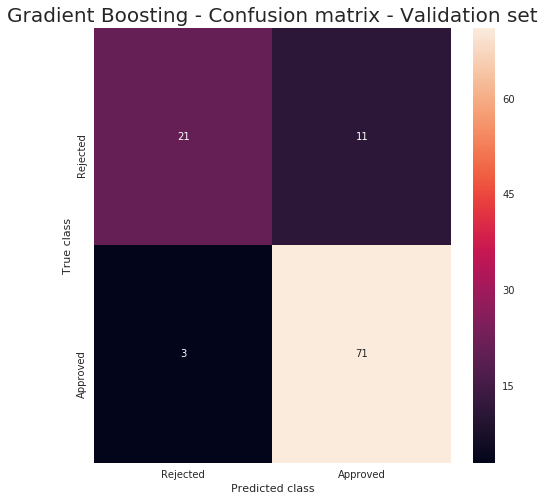

              precision    recall  f1-score   support

    Rejected       0.88      0.66      0.75        32
    Approved       0.87      0.96      0.91        74

    accuracy                           0.87       106
   macro avg       0.87      0.81      0.83       106
weighted avg       0.87      0.87      0.86       106

No Skill: ROC AUC=0.500
Gradient Boosting : ROC AUC=0.203


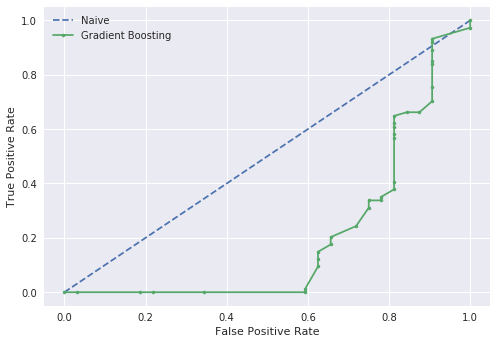

In [78]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,title = 'Gradient Boosting')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = gboost,model_name = 'Gradient Boosting',X_test = X_validation, y_test = y_validation)

In [80]:
#TODO: Execute a small grid search to tune models
#TODO: Execute grid search with CROSS VALIDATION!!!
#TODO: Apply a RFE wrapper to check for variable selection
#TODO: Apply other models

In [79]:
from sklearn.metrics import precision_recall_curve,precision_score

In [44]:
def plot_ROC_with_precision(model,model_name,X_test,y_test):
    
    naive_probs = [0 for _ in range(len(y_test))]
    
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]

    naive_auc = roc_auc_score(y_test, naive_probs)
    model_auc = roc_auc_score(y_test, probs)
    
#     precision = precision_score(y_test, y_pred, average=None)
#     print('No Skill: ROC AUC=%.3f' % (naive_auc))
#     print(model_name,': ROC AUC=%.3f' % (model_auc))

    naive_fpr, naive_tpr, _ = roc_curve(y_test, naive_probs)
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    
    plt.plot(naive_fpr, naive_tpr, linestyle='--', label='Naive')
    plt.plot(model_fpr, model_tpr, marker='.', label=model_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()